In [1]:
import os
import glob
folder_path = "/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/"
dataset_paths = glob.glob(os.path.join(folder_path, "*.csv"))
dataset_paths = [path for path in dataset_paths if "multi_token" in path]
dataset_paths.sort()
dataset_paths

['/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Babel-9B-Chat_English.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Babel-9B-Chat_German.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Babel-9B-Chat_Korean.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Llama-2-7b-chat-hf_English.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Llama-2-7b-chat-hf_German.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_Llama-2-7b-chat-hf_Korean.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hidden_states/multi_token_gemma-3-12b-it_English.csv',
 '/home/hyujang/multilingual-inner-lexicon/output/RQ1/ComponentAnalysis/ffn_hi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

version_colors = {
    "": "#1f77b4",  # Blue
    "v2": "#ff7f0e",  # Orange
    "v3": "#165a16",  # Green
    "v4": "#d62728"   # Red
}

version_linestyles = {
    "": ":",
    "v2": "--",
    "v3": "-.",
    "v4": ":"
}


model_colors = {
    "Babel-9B-Chat": "#66c2a5",
    "gemma-3-12b-it": "#fc8d62",
    "Llama-2-7b-chat-hf": "#e78ac3"
}

# Define colors for each language
language_colors = {
    "English": "#1f77b4",
    "Korean": "#ff7f0e",
    "German": "#2ca02c"
}

# Define line styles for each model
model_styles = {
    "Babel-9B-Chat": "-",
    "gemma-3-12b-it": "--",
    "Llama-2-7b-chat-hf": ":"
}

languague_styles = {
    "English": "-",
    "Korean": "--",
    "German": ":"
}

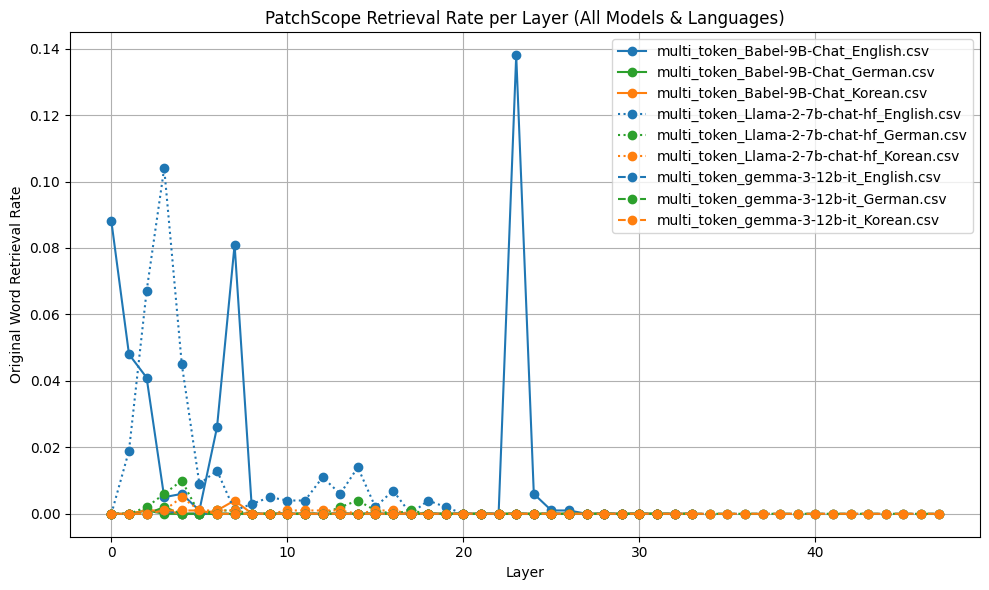

In [3]:

plt.figure(figsize=(10, 6))

for path in dataset_paths:
    # Extract model and language from the file name
    filename = os.path.basename(path)
    model_short = filename.split("_")[2]
    lang = filename.split("_")[3].split(".")[0]
    version = filename.split("_")[-1].split(".")[0]

    # Load CSV
    df = pd.read_csv(path)
    df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)
    retrieval_rate = df.groupby('layer')['retrieved'].mean()

    # Plot
    plt.plot(
        retrieval_rate.index,
        retrieval_rate.values,
        marker='o',
        # label=f"{model_short}-{lang}",
        label = filename,
        color=language_colors.get(lang, "black"),  # Use the color for the language
        # color=version_colors.get(version, "black"),  # Use the color for the version
        # color = model_colors.get(model_short, "black"),  # Use the color for the model
        # color=model_styles.get(model_short, "black"),  # Use the color for the language
        linestyle=model_styles.get(model_short, "dashdot"),  # Use the line style for the model
        # linestyle=version_linestyles.get(version, "-")  # Use the line style for the version
    )

plt.xlabel("Layer")
plt.ylabel("Original Word Retrieval Rate")
plt.title("PatchScope Retrieval Rate per Layer (All Models & Languages)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

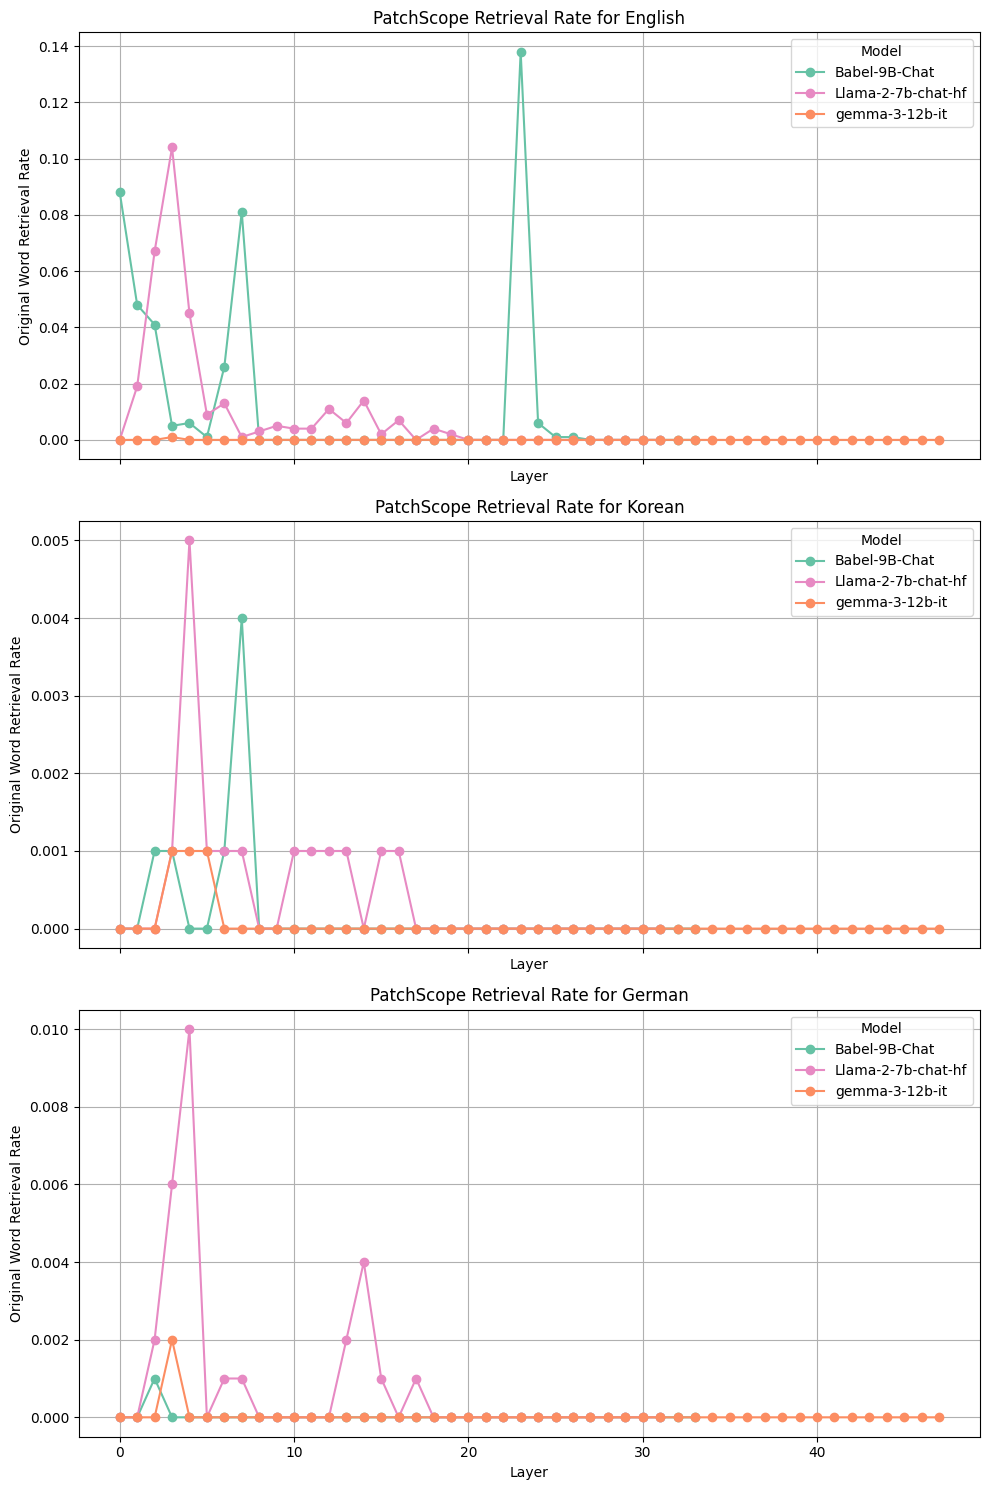

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Group dataset paths by language
language_datasets = {"English": [], "Korean": [], "German": []}
for path in dataset_paths:
    filename = os.path.basename(path)
    lang = filename.split("_")[3].split(".")[0]
    language_datasets[lang].append(path)

# Create subplots for each language
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for ax, (lang, paths) in zip(axes, language_datasets.items()):
    for path in paths:
        filename = os.path.basename(path)
        model_short = filename.split("_")[2]

        # Load CSV
        df = pd.read_csv(path)
        df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)
        retrieval_rate = df.groupby('layer')['retrieved'].mean()

        # Plot
        ax.plot(
            retrieval_rate.index,
            retrieval_rate.values,
            marker='o',
            label=model_short,
            color=model_colors.get(model_short, "black"),
        )

    ax.set_title(f"PatchScope Retrieval Rate for {lang}")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Original Word Retrieval Rate")
    ax.legend(title="Model")
    ax.grid(True)

plt.tight_layout()
plt.show()

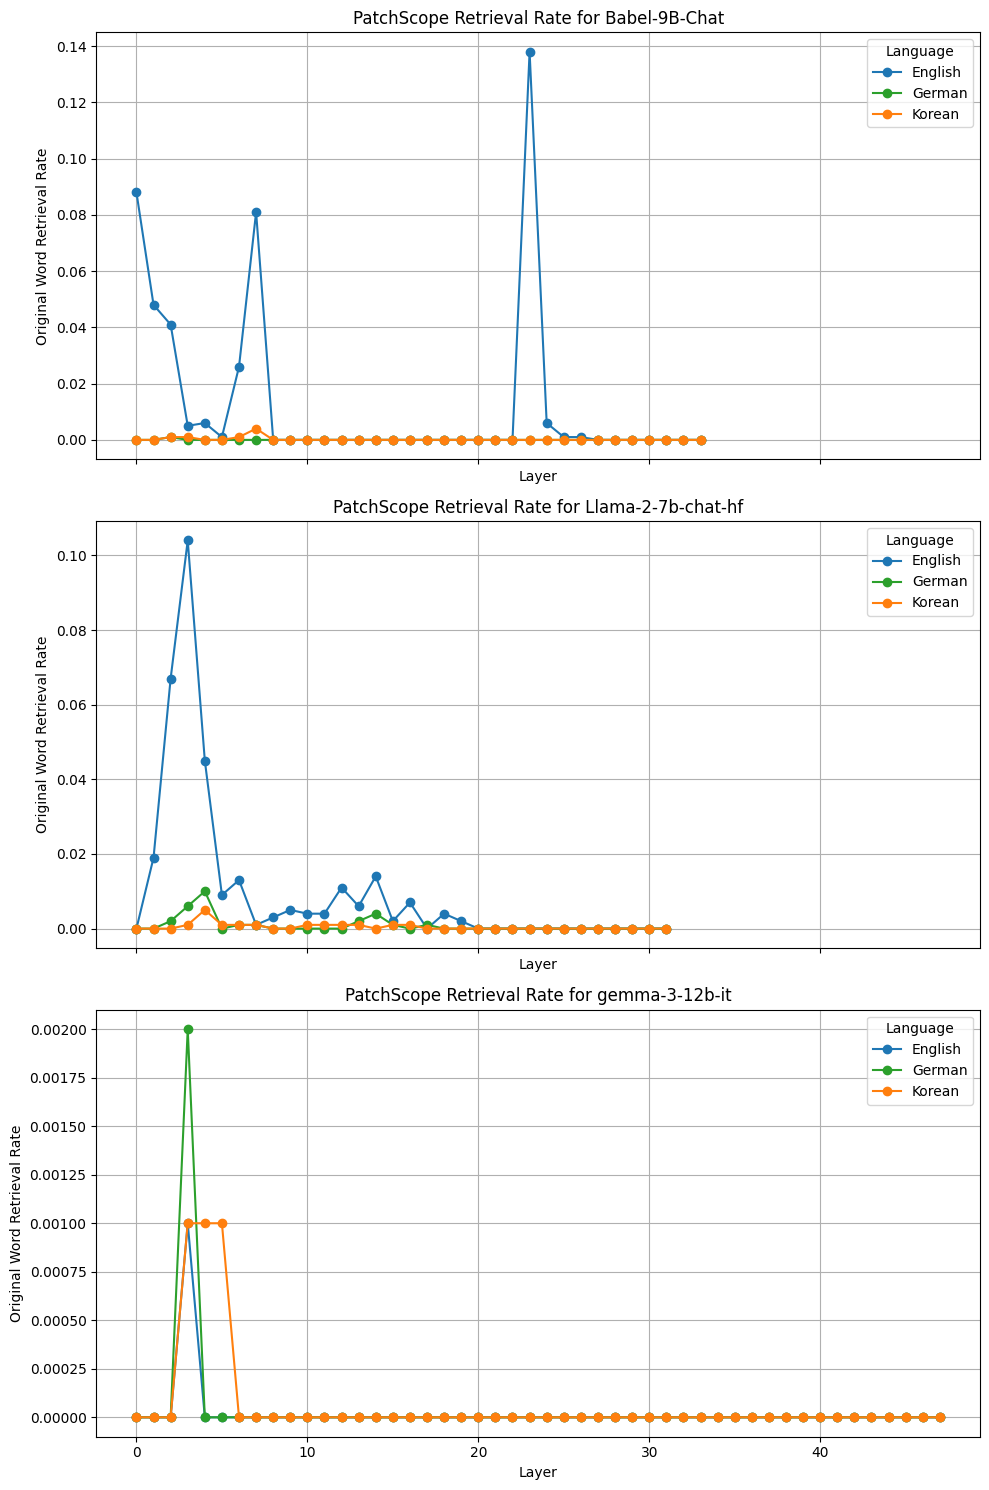

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Group dataset paths by model
model_datasets = {}
for path in dataset_paths:
    filename = os.path.basename(path)
    model_short = filename.split("_")[2]
    if model_short not in model_datasets:
        model_datasets[model_short] = []
    model_datasets[model_short].append(path)

# Create subplots for each model
fig, axes = plt.subplots(len(model_datasets), 1, figsize=(10, 5 * len(model_datasets)), sharex=True)

for ax, (model, paths) in zip(axes, model_datasets.items()):
    for path in paths:
        filename = os.path.basename(path)
        lang = filename.split("_")[3].split(".")[0]

        # Load CSV
        df = pd.read_csv(path)
        df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)
        retrieval_rate = df.groupby('layer')['retrieved'].mean()

        # Plot
        ax.plot(
            retrieval_rate.index,
            retrieval_rate.values,
            marker='o',
            label=lang,
            color=language_colors.get(lang, "black")
        )

    ax.set_title(f"PatchScope Retrieval Rate for {model}")
    ax.set_xlabel("Layer")
    ax.set_ylabel("Original Word Retrieval Rate")
    ax.legend(title="Language")
    ax.grid(True)

plt.tight_layout()
plt.show()

In [33]:
(df.groupby("word").retrieved.mean() == 0).sum() / len(df.groupby("word"))

np.float64(0.899)

In [16]:
df[df['word'] == "Ersatz"]

,word,layer,patchscope_result,retrieved
36048,Ersatz,0,Satz\n\nDas Wort ist,False
36049,Ersatz,1,Satz\n\nDas Wort ist,False
36050,Ersatz,2,"Ersatz\n\nDas Wort """,True
36051,Ersatz,3,"Ersatz\n\nDas Wort """,True
36052,Ersatz,4,"Ersatz\n\nDas Wort """,True
36053,Ersatz,5,"Ersatz\n\nDas Wort """,True
36054,Ersatz,6,"Ersatz\n\nDas Wort """,True
36055,Ersatz,7,"Ersatz\n\nDas Wort """,True
36056,Ersatz,8,"Ersatz\n\nDas Wort """,True
36057,Ersatz,9,"Ersatz\n\nDas Wort """,True


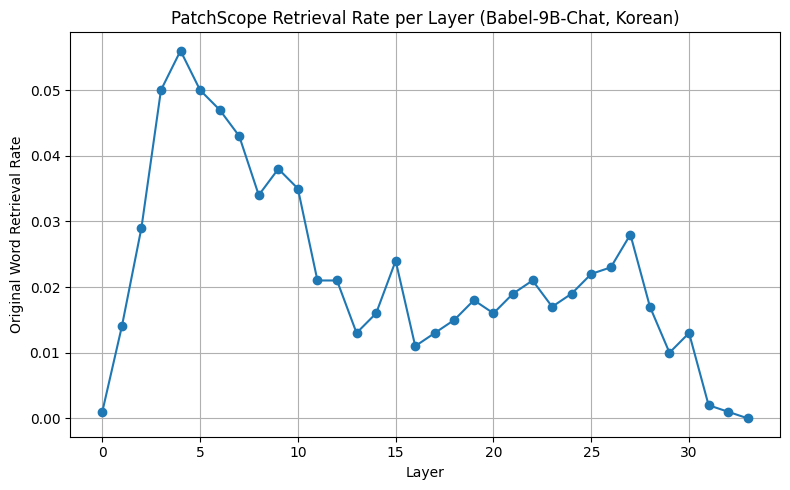

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_NAME = "Tower-Babel/Babel-9B-Chat"
# MODEL_NAME = "google/gemma-3-12b-it"
# LANGUAGE = "English"
LANGUAGE = "Korean"
MODEL_NAME = MODEL_NAME.split("/")[-1]  # Extract model name from the full path

df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/output/RQ1/WordIdentity/multi_token_{MODEL_NAME}_{LANGUAGE}_v2.csv")
df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)

# Group by layer and compute retrieval rate
retrieval_rate = df.groupby('layer')['retrieved'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(retrieval_rate.index, retrieval_rate.values, marker='o')
plt.xlabel("Layer")
plt.ylabel("Original Word Retrieval Rate")
plt.title(f"PatchScope Retrieval Rate per Layer ({MODEL_NAME}, {LANGUAGE})")
plt.grid(True)
plt.tight_layout()
plt.show()

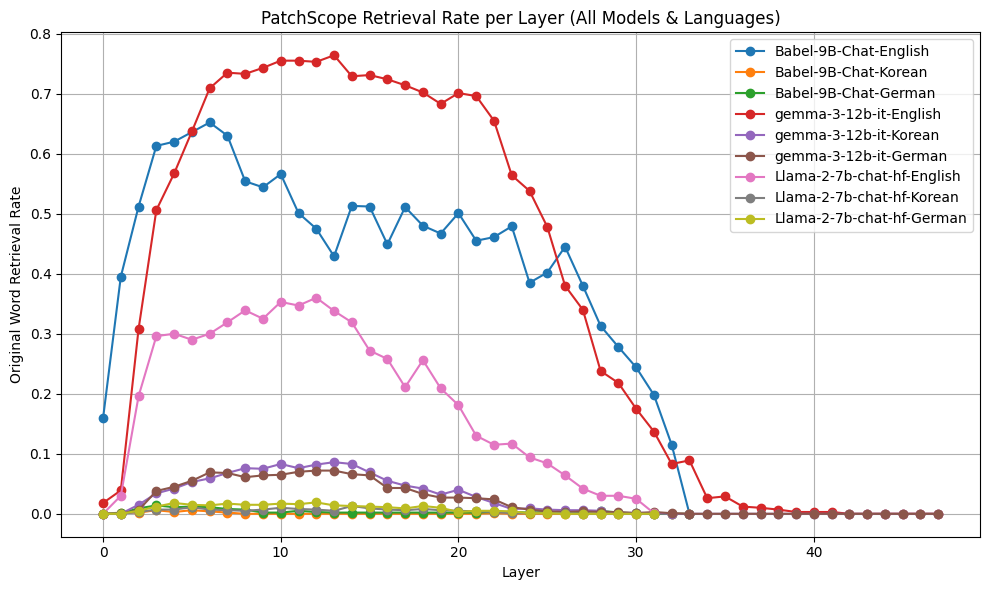

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

models = [
    "Tower-Babel/Babel-9B-Chat",
    "google/gemma-3-12b-it",
    "meta-llama/Llama-2-7b-chat-hf"
]
languages = ["English", "Korean", "German"]
# Define colors for each language
language_colors = {
    "English": "#1f77b4",
    "Korean": "#ff7f0e",
    "German": "#2ca02c"
}

# Define line styles for each model
model_styles = {
    "Babel-9B-Chat": "-",
    "gemma-3-12b-it": "--",
    "Llama-2-7b-chat-hf": ":"
}

plt.figure(figsize=(10, 6))

for model in models:
    model_short = model.split("/")[-1]
    for lang in languages:
        # Load CSV
        path = f"/home/hyujang/multilingual-inner-lexicon/output/RQ1/WordIdentity/multi_token_{model_short}_{lang}.csv"
        df = pd.read_csv(path)
        df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)
        retrieval_rate = df.groupby('layer')['retrieved'].mean()
        plt.plot(
            retrieval_rate.index,
            retrieval_rate.values,
            marker='o',
            label=f"{model_short}-{lang}",
            # color=language_colors.get(lang, "black"),  # Use the color for the language
            # linestyle=model_styles.get(model_short, "dashdot"),  # Use the line style for the model

        )

plt.xlabel("Layer")
plt.ylabel("Original Word Retrieval Rate")
plt.title("PatchScope Retrieval Rate per Layer (All Models & Languages)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()